### import liabraries

In [48]:
# lib for extraction, manipulation, analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore

# train test split
from sklearn.model_selection import train_test_split


### Data Gathering

In [50]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### EDA (Exploratory Data Analysis)

In [52]:
# check for no. of rows and no. of columns
df.shape

(2772, 7)

In [53]:
# check for size
df.size

19404

In [54]:
# check for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [55]:
# check for stats

df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
# check for columns datatype

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Checking of  missing values

In [58]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Analysis for age column

In [208]:
# check for avg age
df["age"].mean()

39.10966810966811

In [61]:
# check for median 

Median_age = df["age"].median()
Median_age

39.0

In [210]:
# check for most repitative age value

mode_age = df["age"].mode()[0]
mode_age

18.0

In [63]:
# check for spread of data

df["age"].var()

198.28749942066437

In [64]:
# check for spread of data  around its mean

df["age"].std()

14.081459420836477

In [65]:
# check for skewness

df["age"].skew()

0.061638859731918856

<Axes: xlabel='age', ylabel='Count'>

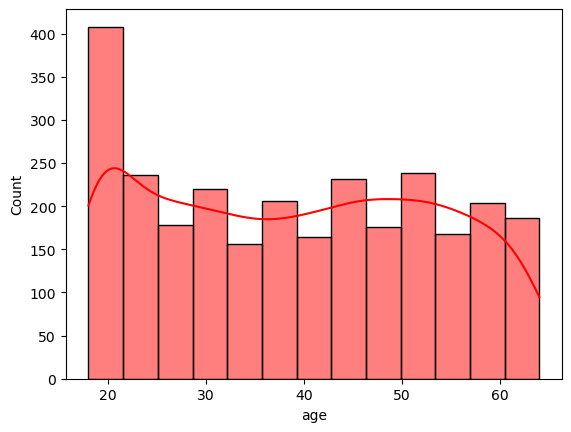

In [66]:
# univariate analysis :  visualization of data by histogram

sns.histplot(df["age"], kde = True, color = "red")

In [67]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(df, col):
    sns.boxplot(df[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(df.head())

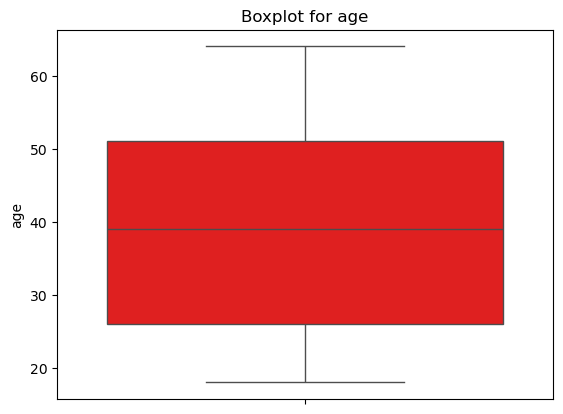

25% Quantile q1 = 26.0
75% Quantile q3 = 51.0
IQR = 25.0

--------------------------------------------------------------------------------
Lower Tail = -11.5
Upper Tail = 88.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900         0    yes  southwest  16884.92400
1  18.0    male  33.770         1     no  southeast   1725.55230
2  28.0    male  33.000         3     no  southeast   4449.46200
3  33.0    male  22.705         0     no  northwest  21984.47061
4  32.0    male  28.880         0     no  northwest   3866.85520


C:\Users\icon\AppData\Local\Temp\ipykernel_15396\1835468603.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-11.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [68]:
Checking_and_Handling_Of_Outliers(df, "age")

#### Analysis for bmi column

In [70]:
# avg bmi 

mean_bmi = df["bmi"].mean()
mean_bmi

30.70134920634921

In [71]:
median_bmi = df["bmi"].median()
median_bmi

30.447499999999998

In [72]:
mode_bmi = df["bmi"].mode()[0]
mode_bmi

32.3

In [73]:
# check for skewness

df["bmi"].skew()

0.27994423304168925

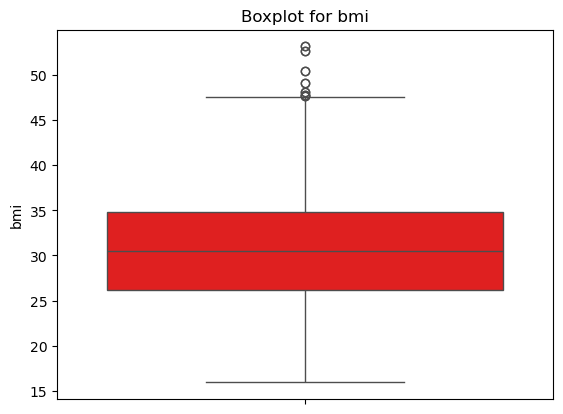

25% Quantile q1 = 26.22
75% Quantile q3 = 34.77
IQR = 8.550000000000004

--------------------------------------------------------------------------------
Lower Tail = 13.394999999999992
Upper Tail = 47.59500000000001
--------------------------------------------------------------------------------

Outliers :
        age     sex    bmi  children smoker     region     charges
116   58.0    male  49.06         0     no  southeast  11381.3254
286   46.0  female  48.07         2     no  northeast   9432.9253
847   23.0    male  50.38         1     no  southeast   2438.0552
860   37.0  female  47.60         2    yes  southwest  46113.5110
1047  22.0    male  52.58         1    yes  southeast  44501.3982
1088  52.0    male  47.74         1     no  southeast   9748.9106
1317  18.0    male  53.13         0     no  southeast   1163.4627
1502  58.0    male  49.06         0     no  southeast  11381.3254
1672  46.0  female  48.07         2     no  northeast   9432.9253
2233  23.0    male  50.38    

In [74]:
# visualize data distribution 

Checking_and_Handling_Of_Outliers(df, "bmi")

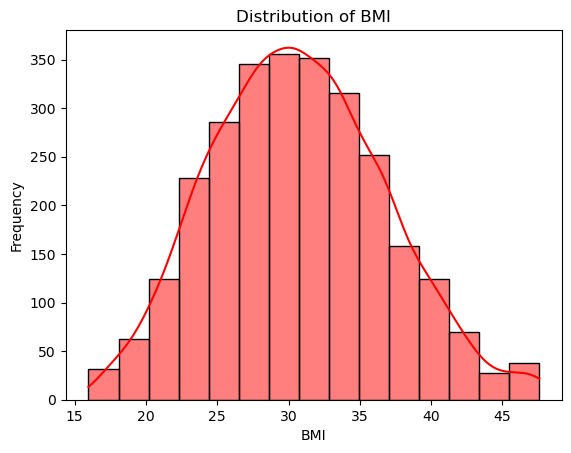

In [212]:
# univariate analysis
sns.histplot(data=df, x='bmi', bins=15, kde=True,color="red")
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

#### Analysis for charges column

In [77]:
mean_charges = df["charges"].mean()
mean_charges

13261.369959046897

In [78]:
median_charges = df["charges"].median()
median_charges

9333.014350000001

In [79]:
mode_charges = df["charges"].mode()[0]
mode_charges

1121.8739

<Axes: xlabel='charges', ylabel='Count'>

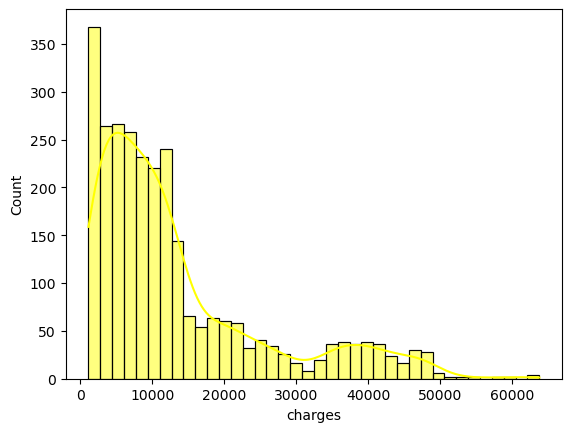

In [80]:
# univariate analysis
sns.histplot(df["charges"], color = "yellow", kde =True)

In [81]:
df["charges"].var()

147665488.49675024

In [82]:
df["charges"].std()

12151.768945168034

In [83]:
df["charges"].max() - df["age"].min()

63752.42801

In [84]:
df["charges"].skew()

1.511315043602352

In [85]:
# Bivariate Analysis - covariance between Age and charges column
covariance = df.iloc[:, [0,2]].cov()
covariance

,age,bmi
age,198.287499,9.911987
bmi,9.911987,37.147217


In [86]:
q1 = df["charges"].quantile(0.25)
q2 = df["charges"].quantile(0.50)
q3 = df["charges"].quantile(0.75)

In [87]:
iqr = q3 - q1
iqr

11889.982500000002

In [88]:
LowerTail = q1 - 1.5*iqr
LowerTail

-13147.176750000006

In [89]:
UpperTail = q3 + 1.5*iqr
UpperTail

34412.75325000001

In [90]:
outliers = df[(df["charges"] < LowerTail) & (df["charges"] > UpperTail)]
outliers

,age,sex,bmi,children,smoker,region,charges


In [224]:
# Bivariate Analysis - corr between Age and charges column

corr = df.iloc[:,[0,2]].corr()
corr

,age,bmi
age,1.000000,0.115491
bmi,0.115491,1.000000


<Axes: >

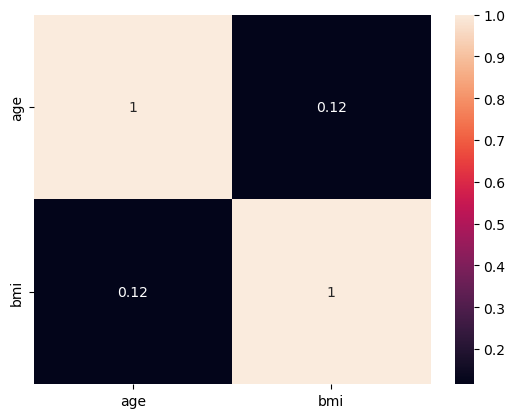

In [93]:
sns.heatmap(corr, annot=True)

In [94]:
# Probability of females  with a bmi max of 10

females = df[df["sex"] == "female"]
females

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
9,60.0,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
2761,54.0,female,35.815,3,no,northwest,12495.29085
2762,21.0,female,32.680,2,no,northwest,26018.95052
2764,22.0,female,31.020,3,yes,southeast,35595.58980
2767,47.0,female,45.320,1,no,southeast,8569.86180


In [95]:
max_10 = females[females["bmi"] > 10]
max_10

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
9,60.0,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
2761,54.0,female,35.815,3,no,northwest,12495.29085
2762,21.0,female,32.680,2,no,northwest,26018.95052
2764,22.0,female,31.020,3,yes,southeast,35595.58980
2767,47.0,female,45.320,1,no,southeast,8569.86180


In [96]:
Prob = len(max_10) / len(females)
Prob

1.0

In [97]:
zscore(df["age"])

0      -1.428353
1      -1.499381
2      -0.789099
3      -0.433959
4      -0.504987
          ...   
2767    0.560436
2768   -1.286297
2769   -1.428353
2770   -1.144240
2771    1.057633
Name: age, Length: 2772, dtype: float64

#### Analysis of Region column

In [99]:
df["region"].nunique()

4

In [100]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [227]:
# ecoding
df["region"]=df["region"].replace({'southwest' : 1, 'southeast' :2 , 'northwest':3, 'northeast':4})   

In [102]:
df["region"].value_counts()

region
2    766
1    684
3    664
4    658
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

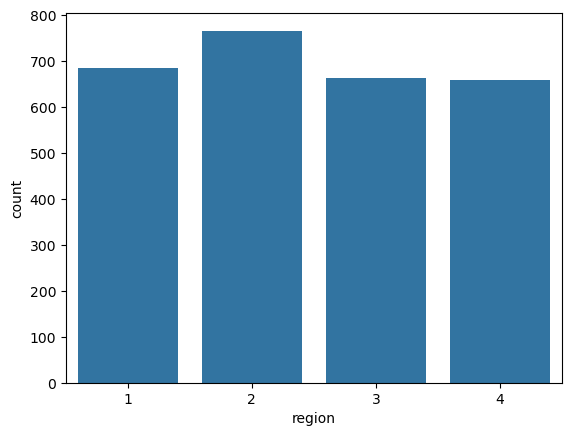

In [103]:
sns.countplot(x = df["region"])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   float64
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 151.7+ KB


#### Analysis of sex column

In [106]:
df["sex"].nunique()

2

In [107]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [108]:
df["sex"].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

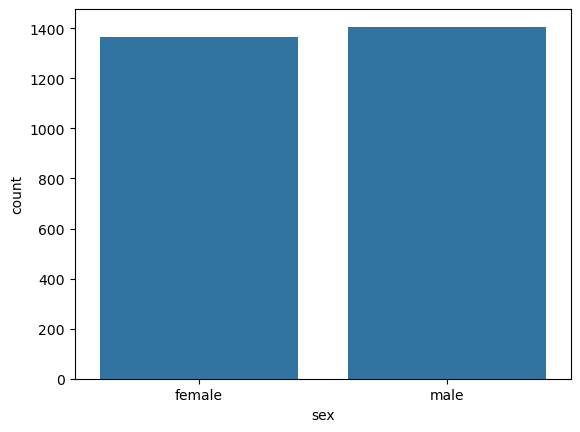

In [109]:
sns.countplot(x=df["sex"])

In [110]:
df["sex"].replace({"male" : 0, "female" : 1})       

C:\Users\icon\AppData\Local\Temp\ipykernel_15396\832981049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].replace({"male" : 0, "female" : 1}, inplace = True)
C:\Users\icon\AppData\Local\Temp\ipykernel_15396\832981049.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"].replac

#### Analysis of smoker column

In [112]:
df["smoker"].nunique()

2

In [113]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [114]:
df["smoker"].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

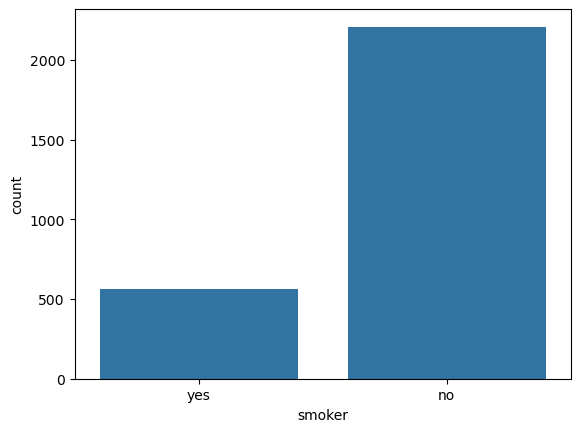

In [115]:
sns.countplot(x=df["smoker"])

In [116]:
# encding

df["smoker"].replace({'no' : 0, "yes" : 1}, inplace = True)   

C:\Users\icon\AppData\Local\Temp\ipykernel_15396\1271499913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace({'no' : 0, "yes" : 1}, inplace = True)
C:\Users\icon\AppData\Local\Temp\ipykernel_15396\1271499913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"].rep

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   float64
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 151.7 KB


In [118]:
# feature selection and check for association between all columns

df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.026046,0.115491,0.037574,-0.023286,-0.000932,0.298624
sex,0.026046,1.000000,-0.041485,-0.016020,-0.082326,0.004808,-0.062837
bmi,0.115491,-0.041485,1.000000,-0.000713,0.011008,-0.159411,0.200457
children,0.037574,-0.016020,-0.000713,1.000000,0.006362,-0.016111,0.066442
smoker,-0.023286,-0.082326,0.011008,0.006362,1.000000,0.006751,0.788783
region,-0.000932,0.004808,-0.159411,-0.016111,0.006751,1.000000,0.013530
charges,0.298624,-0.062837,0.200457,0.066442,0.788783,0.013530,1.000000


<Axes: >

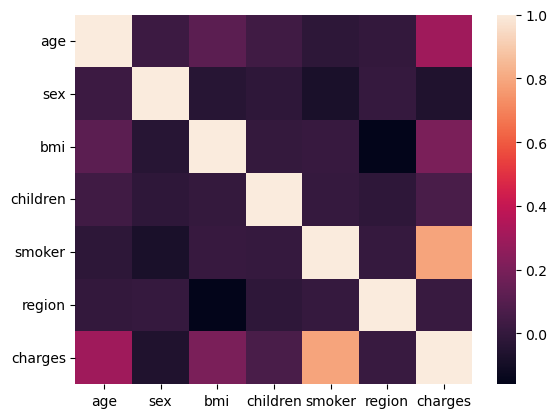

In [119]:
sns.heatmap(df.corr())

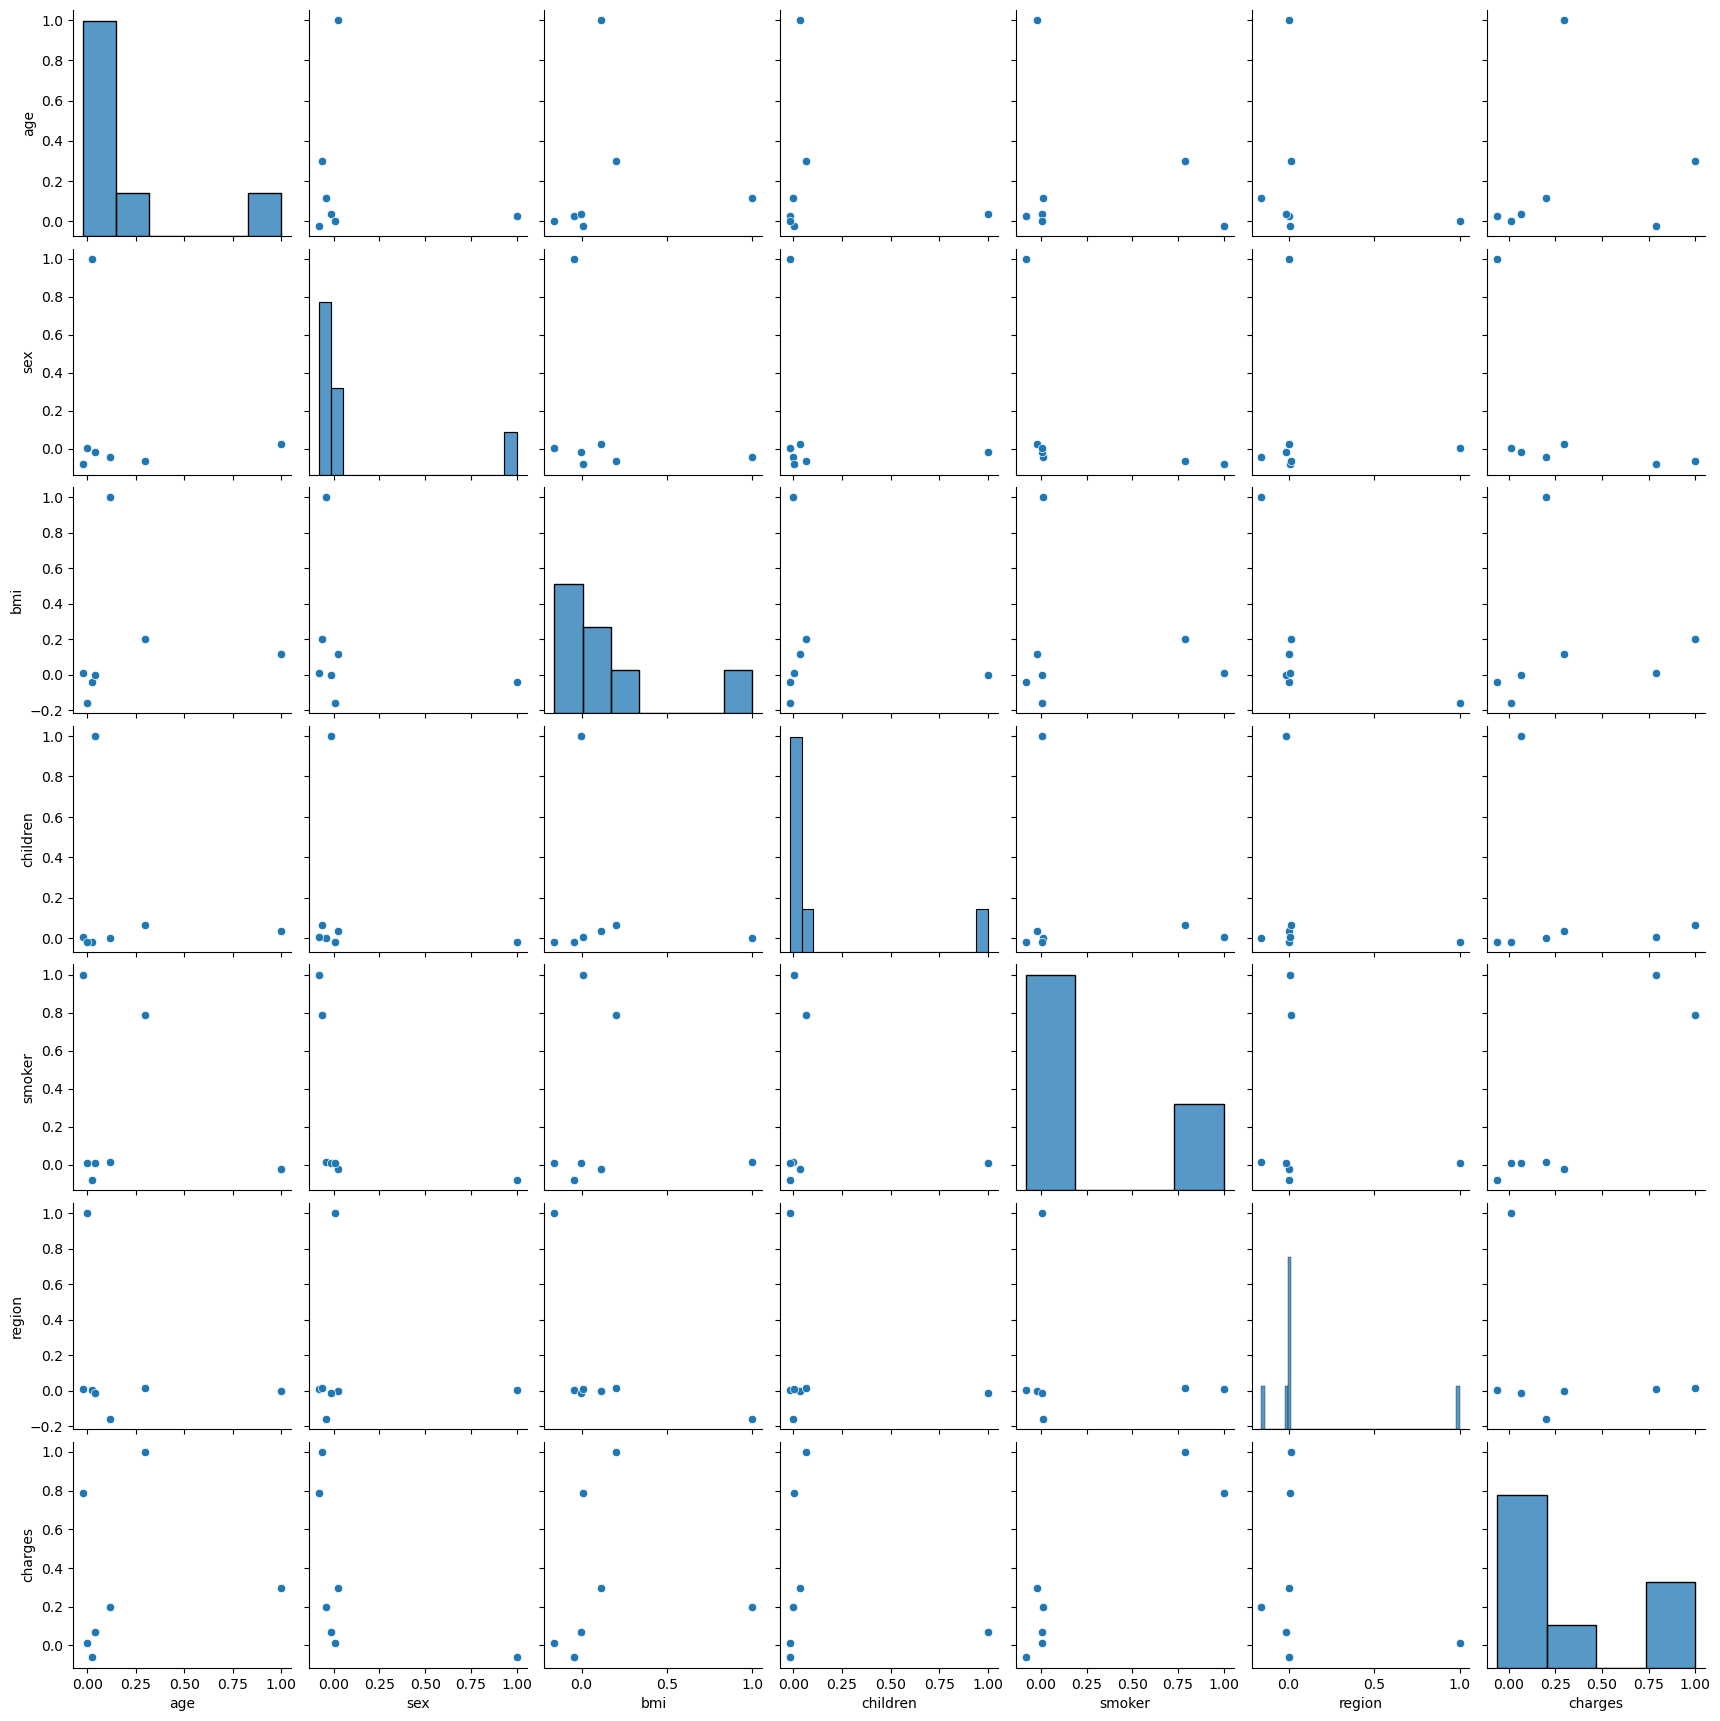

In [120]:
sns.pairplot(df.corr())

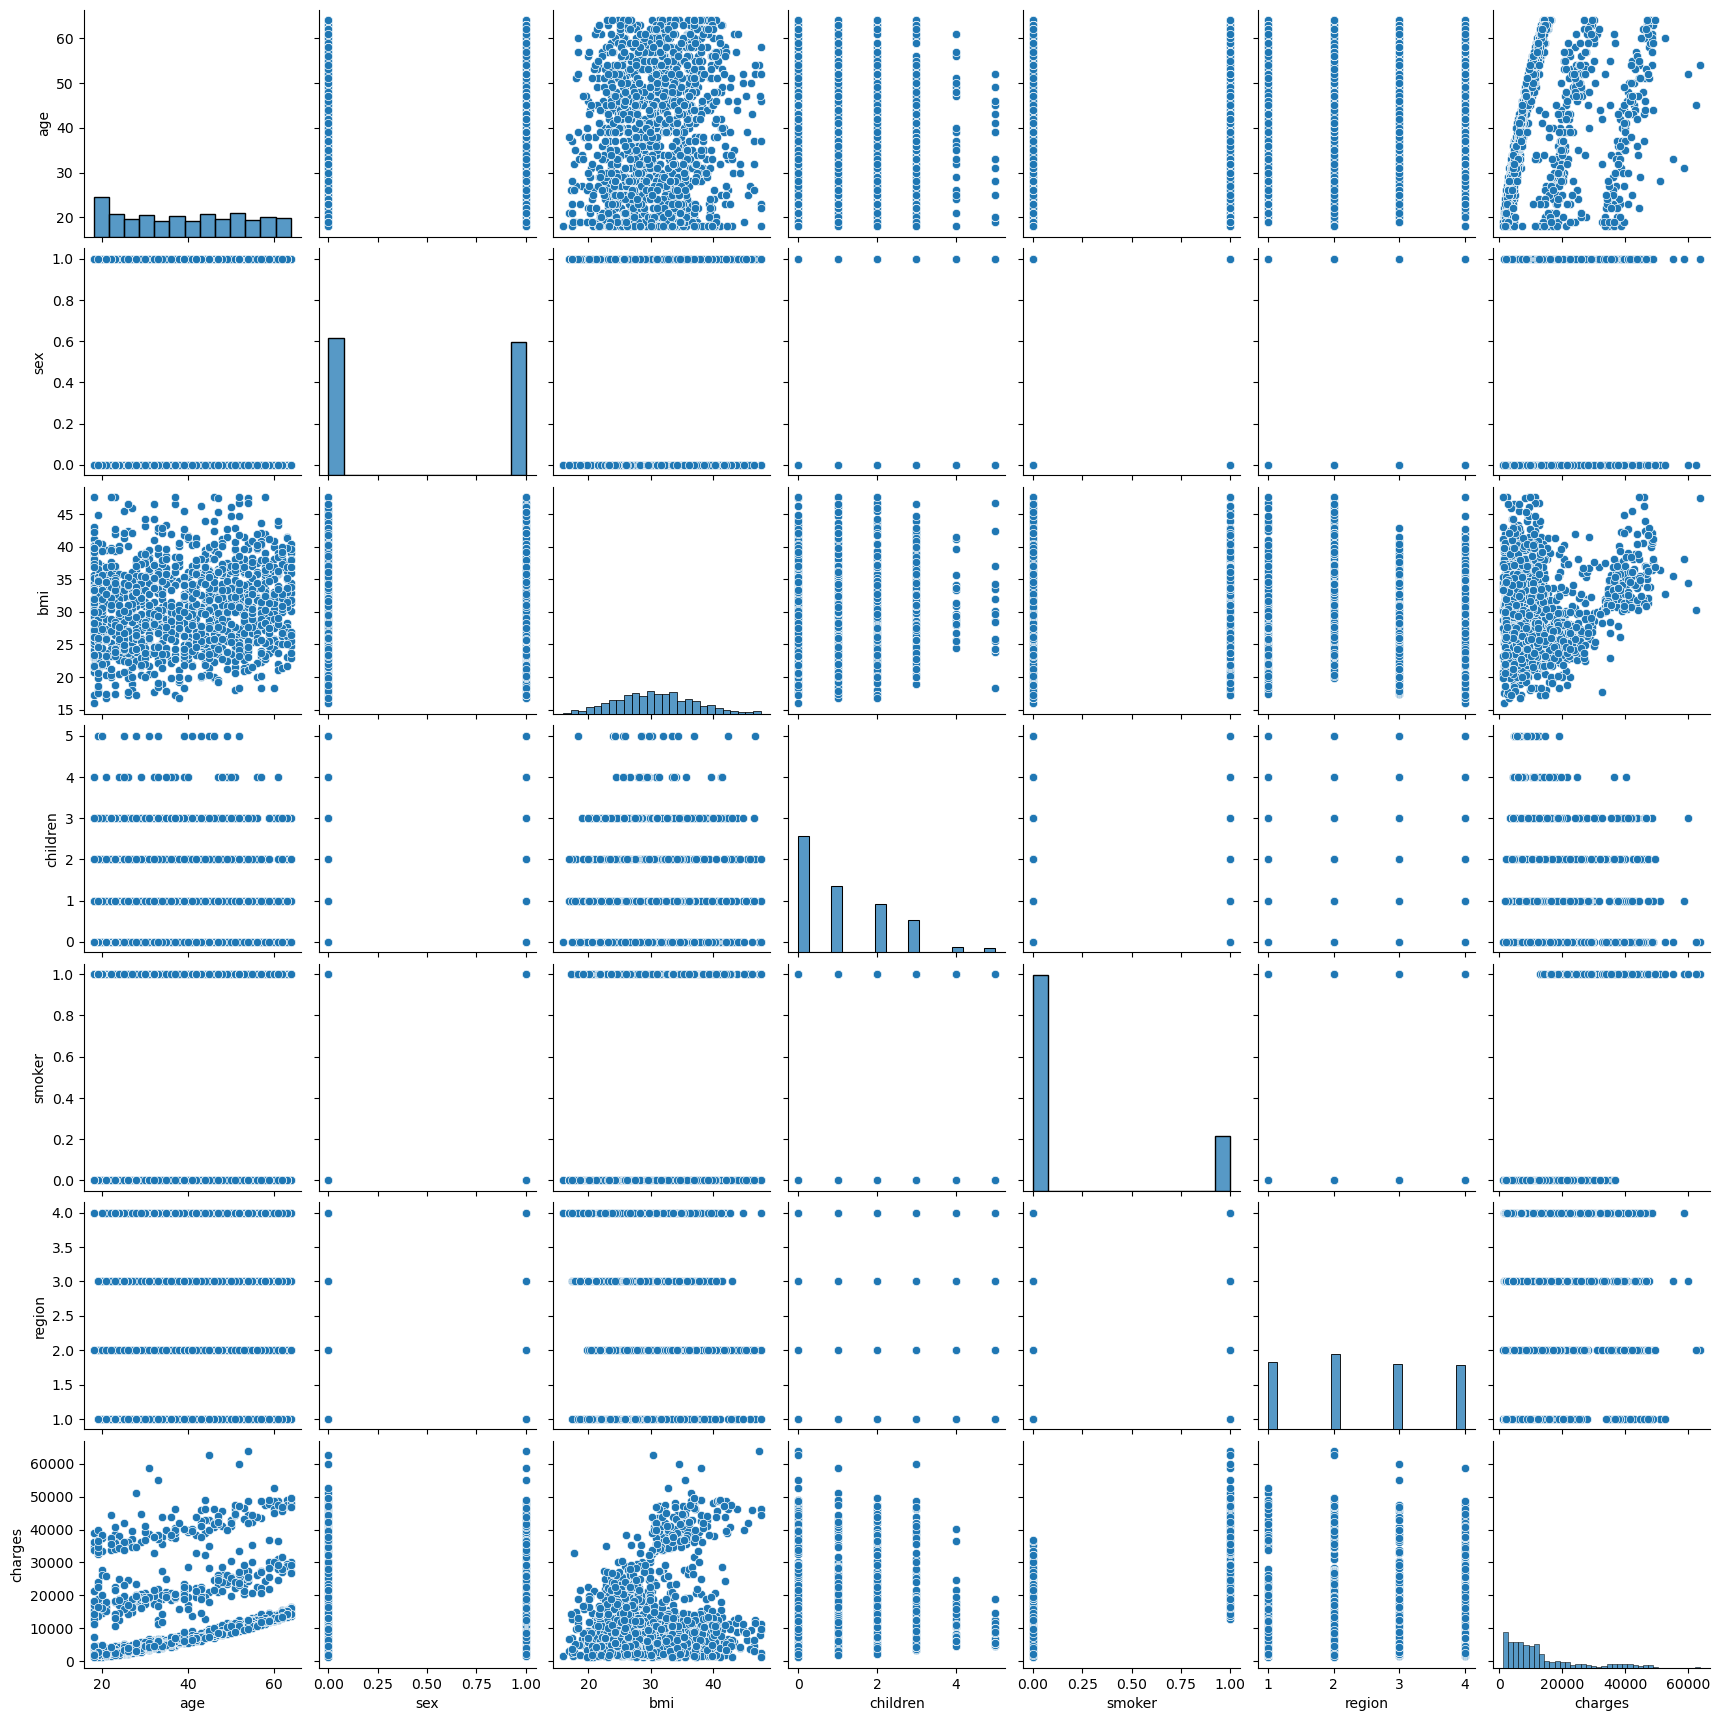

In [121]:
# multivariate analysis
sns.pairplot(df)

In [122]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0,1,1,16884.92400
1,18.0,0,33.770,1,0,2,1725.55230
2,28.0,0,33.000,3,0,2,4449.46200
3,33.0,0,22.705,0,0,3,21984.47061
4,32.0,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
2767,47.0,1,45.320,1,0,2,8569.86180
2768,21.0,1,34.600,0,0,1,2020.17700
2769,19.0,0,26.030,1,1,3,16450.89470
2770,23.0,0,18.715,0,0,3,21595.38229


In [123]:
x = df.iloc[ :, :5]
y = df["charges"]

In [124]:
x.head()

,age,sex,bmi,children,smoker
0,19.0,1,27.900,0,1
1,18.0,0,33.770,1,0
2,28.0,0,33.000,3,0
3,33.0,0,22.705,0,0
4,32.0,0,28.880,0,0


In [125]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

##### train test split

In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [128]:
xtrain.shape

(1940, 5)

In [129]:
xtest.shape

(832, 5)

In [130]:
ytrain.shape

(1940,)

In [131]:
ytest.shape

(832,)